# Using Waggle to Interact with Microphone

Befor going any further make sure you have pywaggle installed.
The latest version of pywaggle with all optional dependencies can be installed using:
```
git clone https://github.com/waggle-sensor/pywaggle
pip install ./pywaggle[dev]
```
For more information on using Waggle see the [pywaggle GitHub](https://github.com/waggle-sensor/pywaggle).

## Record audio

Records in "interval" seconds for "length" seconds for an "amount" number of audio files, and stores them in the `audio_files` directory labeled as "audioSample{x}.wav". The save function can save in multiple formats 

In [1]:
from waggle.data.audio import Microphone
import time

ModuleNotFoundError: No module named 'waggle'

In [2]:
amount = 2 # how many times the microphone should record
interval = 5 # the pause in seconds between each recording
length = 10 # how long the microphone should record

In [3]:
microphone = Microphone()

num = 0
while True:
    
    if num == amount:
        break
        
    sample = microphone.record(length)
    sample.save(f"audio_files/audioSample{num}.wav")
    time.sleep(interval)
        
    num += 1

## Access audio data
Accessing audio with the Waggle platform is more convenient when it's multiple files within a directory. Otherwise, see the instructions in the `ReadRecordAudio.ipynb` notebook for a singular file

The code below returns the data, timestamp, and samplerate of multiple audio files within the `audio_files` directory, and it also graphs that data. For the sake of comparison, I included reading a file using the `wavfile` script. Notice that using `wavfile.read()` outputs different data values than accessing a file with the Waggle platform. This is because `wavfile.read()` outputs integer type. pywaggle uses floating point type, but there's no substantial difference except that floating point type can be easier to interpret, as seen by the graphs
* Ultimately, any functionality with the `scipy.io` package is optional and not required for working with audio using Waggle
* This also goes for graphing the data using `matplotlib.pyplot` and `numpy`

In [4]:
from waggle.data.audio import AudioFolder
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

samplerate: 48000 
 timestamp: 1629329621435004516 
data in integer type: [  1822   2204   2594 ... -14727 -15054 -15319]


samplerate: 48000 
 timestamp: 1629329621435004516 
data in floating point type: [[ 0.05560303]
 [ 0.06726074]
 [ 0.0791626 ]
 ...
 [-0.44943237]
 [-0.45941162]
 [-0.46749878]]




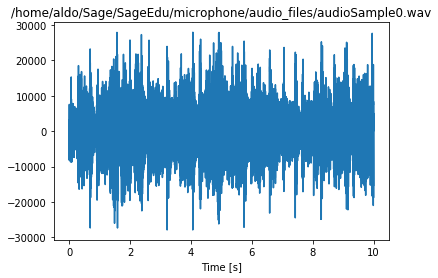

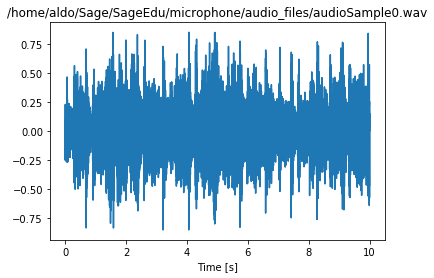

samplerate: 48000 
 timestamp: 1629329637711388431 
data in integer type: [ -751 -1046  -615 ...  -741 -2270 -3542]


samplerate: 48000 
 timestamp: 1629329637711388431 
data in floating point type: [[-0.0229187 ]
 [-0.03192139]
 [-0.01876831]
 ...
 [-0.02261353]
 [-0.0692749 ]
 [-0.10809326]]




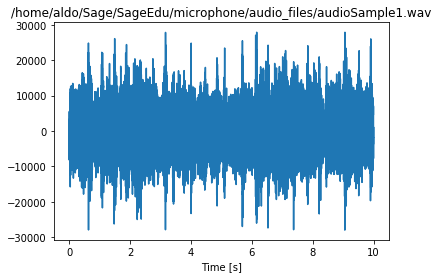

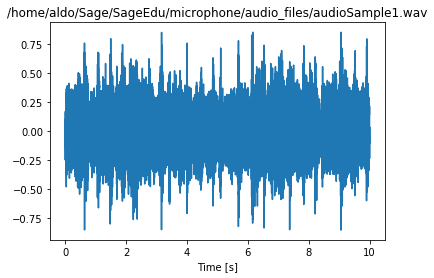

samplerate: 44100 
 timestamp: 1626823080680065724 
data in integer type: [[  80   80]
 [  72   72]
 [  56   56]
 ...
 [3712 3712]
 [3288 3288]
 [1564 1564]]


samplerate: 44100 
 timestamp: 1626823080680065724 
data in floating point type: [[0.00244141 0.00244141]
 [0.00219727 0.00219727]
 [0.00170898 0.00170898]
 ...
 [0.11328125 0.11328125]
 [0.1003418  0.1003418 ]
 [0.04772949 0.04772949]]




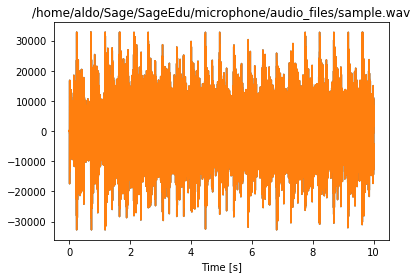

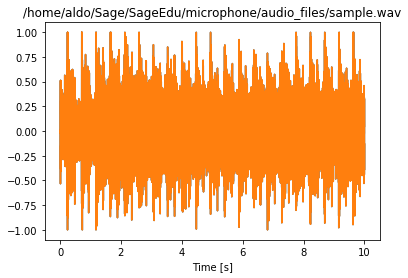

samplerate: 44100 
 timestamp: 1626823080824069358 
data in integer type: [[416  62]
 [249  24]
 [200 -36]
 ...
 [  0   0]
 [  0   0]
 [  0   0]]


samplerate: 44100 
 timestamp: 1626823080824069358 
data in floating point type: [[ 0.01269531  0.00189209]
 [ 0.00759888  0.00073242]
 [ 0.00610352 -0.00109863]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]




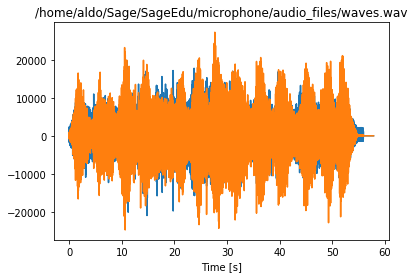

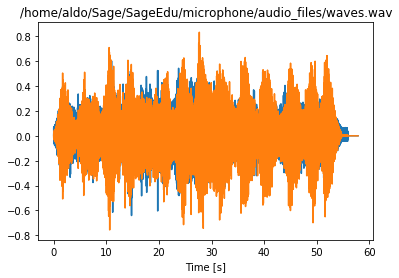

In [5]:
dataset = AudioFolder("audio_files") # desired directory
x = 0
for sample in dataset:
    link = str(dataset.files[x])
    (samplerate, data) = wavfile.read(dataset.files[x])
    print(f'samplerate: {samplerate} \n timestamp: {sample.timestamp} \ndata in integer type: {data}\n\n')
    print(f'samplerate: {sample.samplerate} \n timestamp: {sample.timestamp} \ndata in floating point type: {sample.data}\n\n')
    time = np.arange(0, len(data) / samplerate, 1/samplerate)
    time2 = np.arange(0, len(sample.data) / sample.samplerate, 1/sample.samplerate)
    # time = np.linspace(0, len(data) / samplerate, len(data)) alternative way of organizing data
    plt.figure(x)
    plt.title(link)
    plt.xlabel("Time [s]")
    plt.plot(time, data)
    plt.show()
    
    plt.figure(x)
    plt.title(link)
    plt.xlabel("Time [s]")
    plt.plot(time2, sample.data)
    plt.show()
    x += 1

## Delete files
Run the bottom code to delete the saved audio files in the directory this notebooks sits in

In [6]:
import os

In [7]:
for x in range(amount):
    os.unlink(f"audio_files/audioSample{x}.wav")